In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.losses import MeanSquaredError 
from tensorflow.keras.metrics import RootMeanSquaredError 
from tensorflow.keras.optimizers import Adam 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('KURS IDRUSD 20132023.csv', sep=';')
df

,date,kurs_close,value_import,value_export,volume_import,volume_export
0,2015-01-01,12385,143,150,147093,508827
1,2015-01-02,12543,143,150,147093,508827
2,2015-01-05,12628,143,150,147093,508827
3,2015-01-06,12658,143,150,147093,508827
4,2015-01-07,12739,143,150,147093,508827
...,...,...,...,...,...,...
2287,2023-12-25,15467,222,259,197971,701798
2288,2023-12-26,15407,222,259,197971,701798
2289,2023-12-27,15425,222,259,197971,701798
2290,2023-12-28,15415,222,259,197971,701798


In [3]:
df['value_import'] = df['value_import'] * 1_000_000
df['value_export'] = df['value_export'] * 1_000_000

In [4]:
df

,date,kurs_close,value_import,value_export,volume_import,volume_export
0,2015-01-01,12385,143000000,150000000,147093,508827
1,2015-01-02,12543,143000000,150000000,147093,508827
2,2015-01-05,12628,143000000,150000000,147093,508827
3,2015-01-06,12658,143000000,150000000,147093,508827
4,2015-01-07,12739,143000000,150000000,147093,508827
...,...,...,...,...,...,...
2287,2023-12-25,15467,222000000,259000000,197971,701798
2288,2023-12-26,15407,222000000,259000000,197971,701798
2289,2023-12-27,15425,222000000,259000000,197971,701798
2290,2023-12-28,15415,222000000,259000000,197971,701798


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           2292 non-null   object
 1   kurs_close     2292 non-null   int64 
 2   value_import   2292 non-null   int64 
 3   value_export   2292 non-null   int64 
 4   volume_import  2292 non-null   int64 
 5   volume_export  2292 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 107.6+ KB


In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2292 non-null   datetime64[ns]
 1   kurs_close     2292 non-null   int64         
 2   value_import   2292 non-null   int64         
 3   value_export   2292 non-null   int64         
 4   volume_import  2292 non-null   int64         
 5   volume_export  2292 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 107.6 KB


In [8]:
df.corr()["kurs_close"].sort_values(ascending=False)

kurs_close       1.000000
date             0.825484
volume_export    0.762829
volume_import    0.690961
value_import     0.684193
value_export     0.680033
Name: kurs_close, dtype: float64

In [9]:
df.set_index('date', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2015-01-01 to 2023-12-29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   kurs_close     2292 non-null   int64
 1   value_import   2292 non-null   int64
 2   value_export   2292 non-null   int64
 3   volume_import  2292 non-null   int64
 4   volume_export  2292 non-null   int64
dtypes: int64(5)
memory usage: 107.4 KB


In [11]:
df

,kurs_close,value_import,value_export,volume_import,volume_export
date,,,,,
2015-01-01,12385,143000000,150000000,147093,508827
2015-01-02,12543,143000000,150000000,147093,508827
2015-01-05,12628,143000000,150000000,147093,508827
2015-01-06,12658,143000000,150000000,147093,508827
2015-01-07,12739,143000000,150000000,147093,508827
...,...,...,...,...,...
2023-12-25,15467,222000000,259000000,197971,701798
2023-12-26,15407,222000000,259000000,197971,701798
2023-12-27,15425,222000000,259000000,197971,701798


In [12]:
scaler = StandardScaler()
scaler_values = scaler.fit_transform(df[df.columns])

In [13]:
scaler_values

array([[-2.31750268, -0.98364478, -0.90502858, -1.26350601, -1.39985518],
       [-2.10871166, -0.98364478, -0.90502858, -1.26350601, -1.39985518],
       [-1.99638738, -0.98364478, -0.90502858, -1.26350601, -1.39985518],
       ...,
       [ 1.69974219,  1.33078044,  1.313349  ,  1.94931893,  1.66544108],
       [ 1.68652757,  1.33078044,  1.313349  ,  1.94931893,  1.66544108],
       [ 1.66009833,  1.33078044,  1.313349  ,  1.94931893,  1.66544108]])

In [14]:
df_scaled = pd.DataFrame(scaler_values, columns = df.columns, index = df.index)

In [15]:
df_scaled

,kurs_close,value_import,value_export,volume_import,volume_export
date,,,,,
2015-01-01,-2.317503,-0.983645,-0.905029,-1.263506,-1.399855
2015-01-02,-2.108712,-0.983645,-0.905029,-1.263506,-1.399855
2015-01-05,-1.996387,-0.983645,-0.905029,-1.263506,-1.399855
2015-01-06,-1.956744,-0.983645,-0.905029,-1.263506,-1.399855
2015-01-07,-1.849705,-0.983645,-0.905029,-1.263506,-1.399855
...,...,...,...,...,...
2023-12-25,1.755244,1.330780,1.313349,1.949319,1.665441
2023-12-26,1.675956,1.330780,1.313349,1.949319,1.665441
2023-12-27,1.699742,1.330780,1.313349,1.949319,1.665441


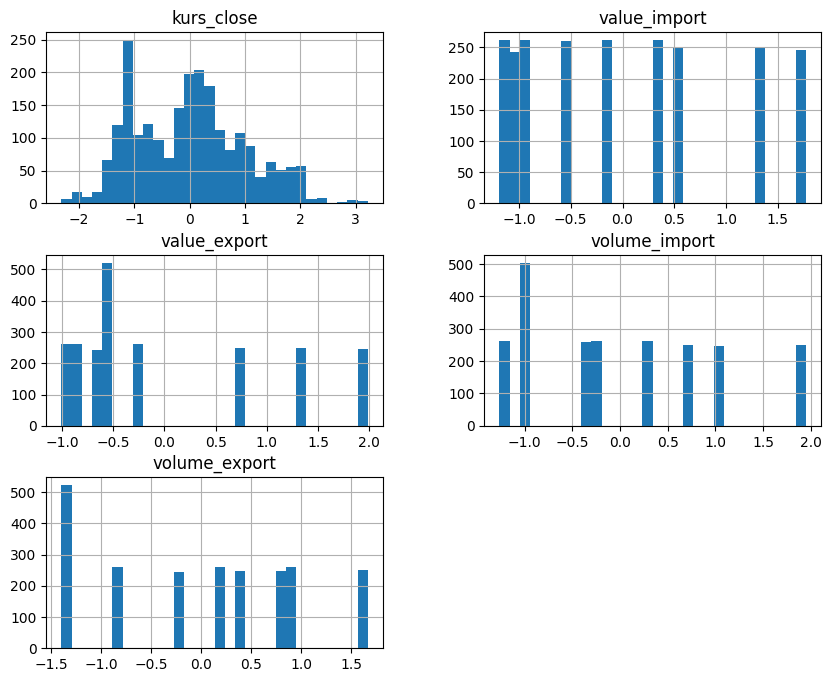

In [16]:
df_scaled[['kurs_close', 'value_import', 'value_export', 'volume_import', 'volume_export']].hist(bins=30, figsize=(10, 8))
plt.show()

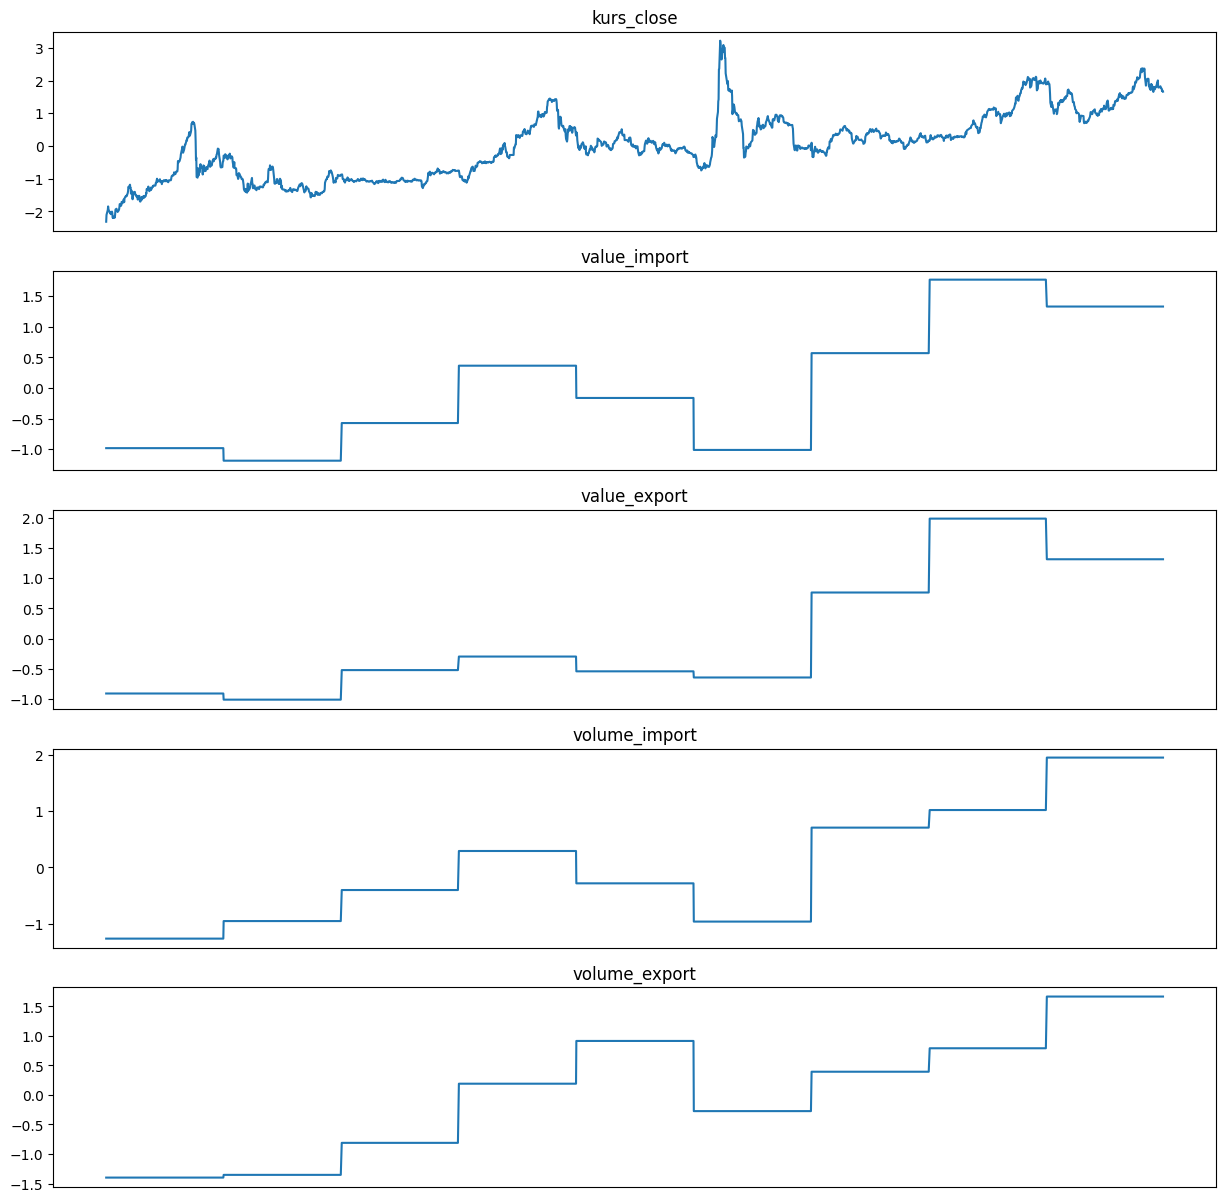

In [17]:
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(5)

for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

In [18]:
test_split=round(len(df_scaled)*0.20)
training=df_scaled[:1834]
testing=df_scaled[1834:]

In [19]:
def createXY(data,timestep):
    x = []
    y = []
    for i in range(timestep, len(data)):
            x.append(data.iloc[i-timestep:i].values)
            y.append(data.iloc[i].values)
    return np.array(x),np.array(y)
timestep = 30
x_train, y_train = createXY(training, timestep)
x_test, y_test = createXY(testing, timestep)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(1804, 30, 5)
(1804, 5)
(428, 30, 5)
(428, 5)


In [20]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(x_train.shape[1], x_train.shape[2])))
model1.add(Dropout(0.2))
model1.add(Bidirectional(LSTM(64, return_sequences=True)))
model1.add(Dropout(0.2))
model1.add(Bidirectional(LSTM(32, return_sequences=True)))
model1.add(Dropout(0.2))
model1.add(Bidirectional(LSTM(16, return_sequences=False)))
model1.add(Dropout(0.2))
model1.add(Dense(1, 'linear'))
model1.summary()

c:\Users\LOQ\Documents\Coding\belajar-bilstm\bilstmvenv\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 256)        │       137,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 30, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 30, 64)         │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353,185 (1.35 MB)

 Trainable params: 353,185 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
history = model1.fit(x_train, y_train, epochs=480, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/480
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.2282 - root_mean_squared_error: 0.4748 - val_loss: 0.4424 - val_root_mean_squared_error: 0.6651
Epoch 2/480
226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1701 - root_mean_squared_error: 0.4123 - val_loss: 0.3739 - val_root_mean_squared_error: 0.6115
Epoch 3/480
226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1747 - root_mean_squared_error: 0.4179 - val_loss: 0.4075 - val_root_mean_squared_error: 0.6384
Epoch 4/480
226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1687 - root_mean_squared_error: 0.4106 - val_loss: 0.4061 - val_root_mean_squared_error: 0.6373
Epoch 5/480
226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1593 - root_mean_squared_error: 0.3991 - val_loss: 0.3694 - val_root_mean_squared_error: 0.6078
Epoch 6/480
226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1657 - root_mean_squared_error: 0.4066 - val_loss: 0.3772 - val_root_mean_squared_error: 0.6142
Epoch 7/480
226/226 ━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [49]:
loss, rmse = model1.evaluate(x_test, y_test, verbose=1)

print("Loss:", loss)
print("RMSE:", rmse)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4111 - root_mean_squared_error: 0.5842
Loss: 0.7329423427581787
RMSE: 0.8561205267906189


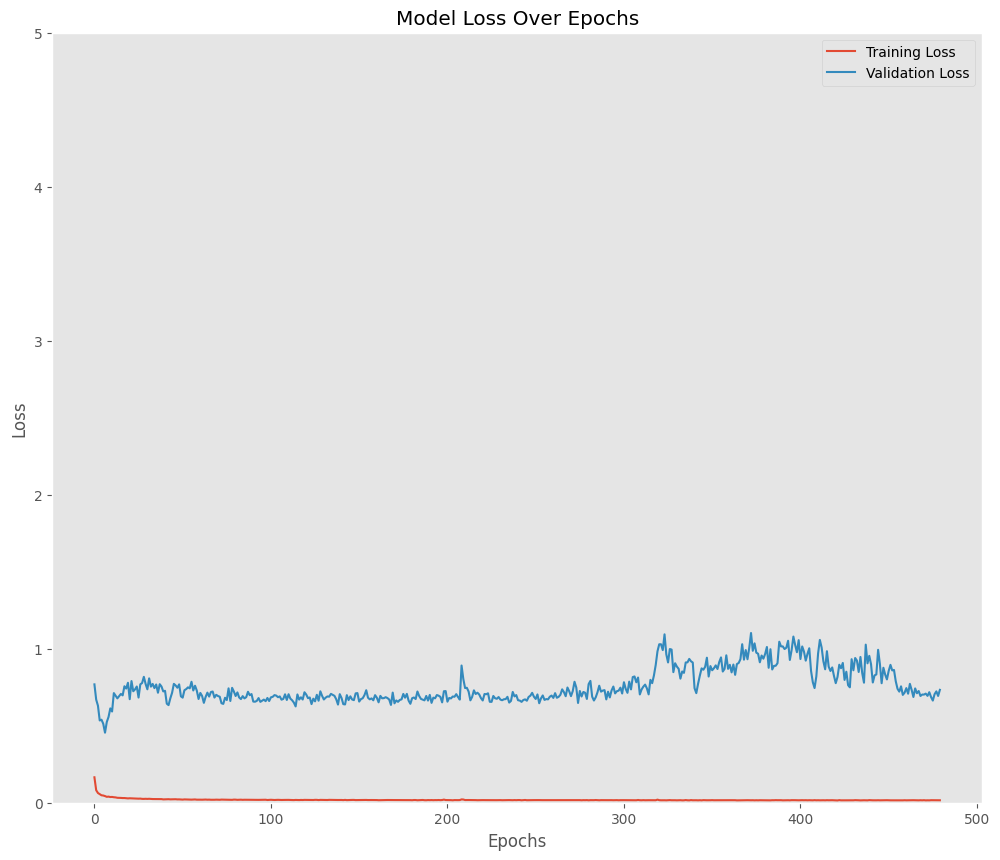

In [50]:
history_df = pd.DataFrame(history.history)

# Set the plot style
plt.style.use("ggplot")

# Create the plot
plt.figure(figsize=(12, 10))

# Plot the relevant metrics
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')

# Set the y-axis limits to focus on the range 0-1
plt.ylim(0, 5)

# Add titles and labels
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

# Show the plot
plt.show()

In [ ]:
# prediction = (model1.predict(x_test)).reshape(-1)
# original = y_test

# print(prediction.shape)
# print(original.shape)

pred = model1.predict(x_test)
pred = scaler.inverse_transform(pred)
actual = scaler.inverse_transform(y_test)

# pred = pred.reshape(-1)
# actual = y_test_rescaled.reshape(-1)

# print(pred.shape)
# print(actual.shape)

print(actual.shape)
print(pred.shape) 

NameError: name 'model1' is not defined

In [52]:
# train_result = pd.DataFrame(data={'Prediction':pred, 'Actual':actual})
# train_result

# Mengubah actual dan pred menjadi DataFrame
actual_df = pd.DataFrame(actual, columns=[f'Real Value {i+1}' for i in range(actual.shape[1])])
predictions_df = pd.DataFrame(pred, columns=[f'Prediction {i+1}' for i in range(pred.shape[1])])

pred =  predictions_df.iloc[:, 0]
actual = actual_df.iloc[:, 0]

comparison_df = pd.DataFrame({
    'Real Values': actual,  # Ambil kolom pertama dari actual
    'Predictions': pred  # Ambil kolom pertama dari pred
})

# Memeriksa hasil
print(comparison_df)

     Real Values   Predictions
0        14360.0  14387.780273
1        14362.0  14387.827148
2        14343.0  14387.899414
3        14353.0  14386.491211
4        14335.0  14386.151367
..           ...           ...
423      15467.0  14814.071289
424      15407.0  14807.904297
425      15425.0  14792.759766
426      15415.0  14786.867188
427      15395.0  14783.859375

[428 rows x 2 columns]


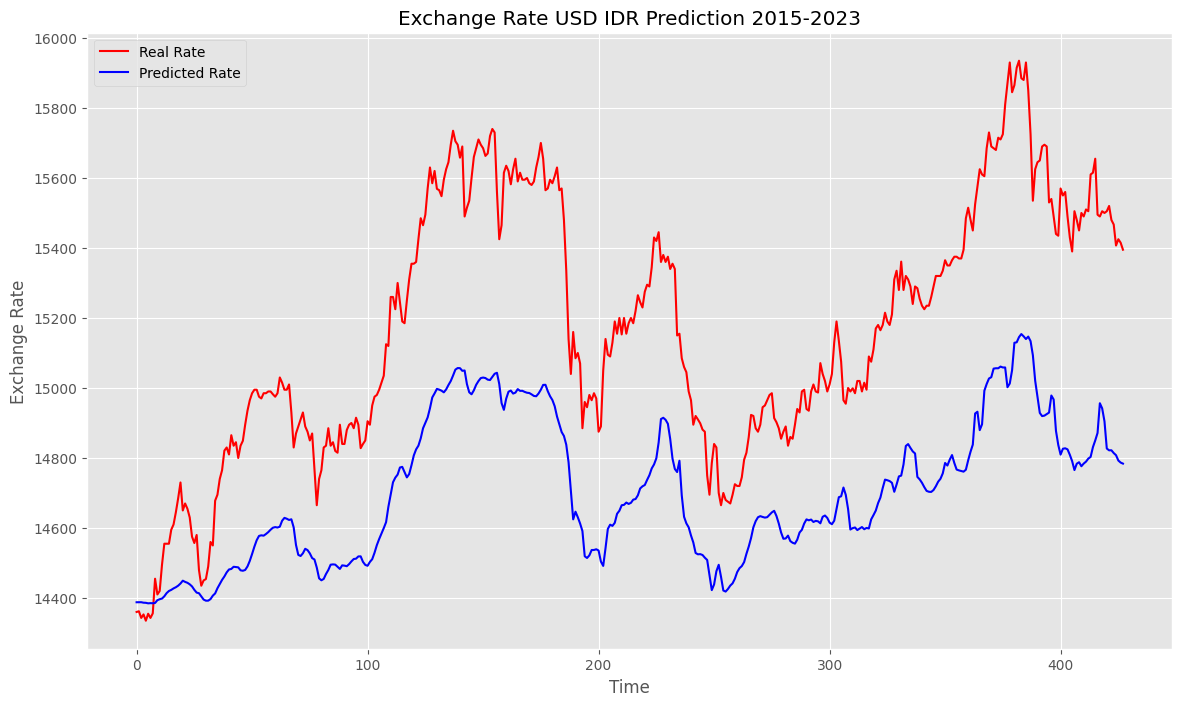

In [53]:
plt.figure(figsize=(14, 8))
plt.plot(actual, color = 'red', label = 'Real Rate')
plt.plot(pred, color = 'blue', label = 'Predicted Rate')
plt.title('Exchange Rate USD IDR Prediction 2015-2023')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

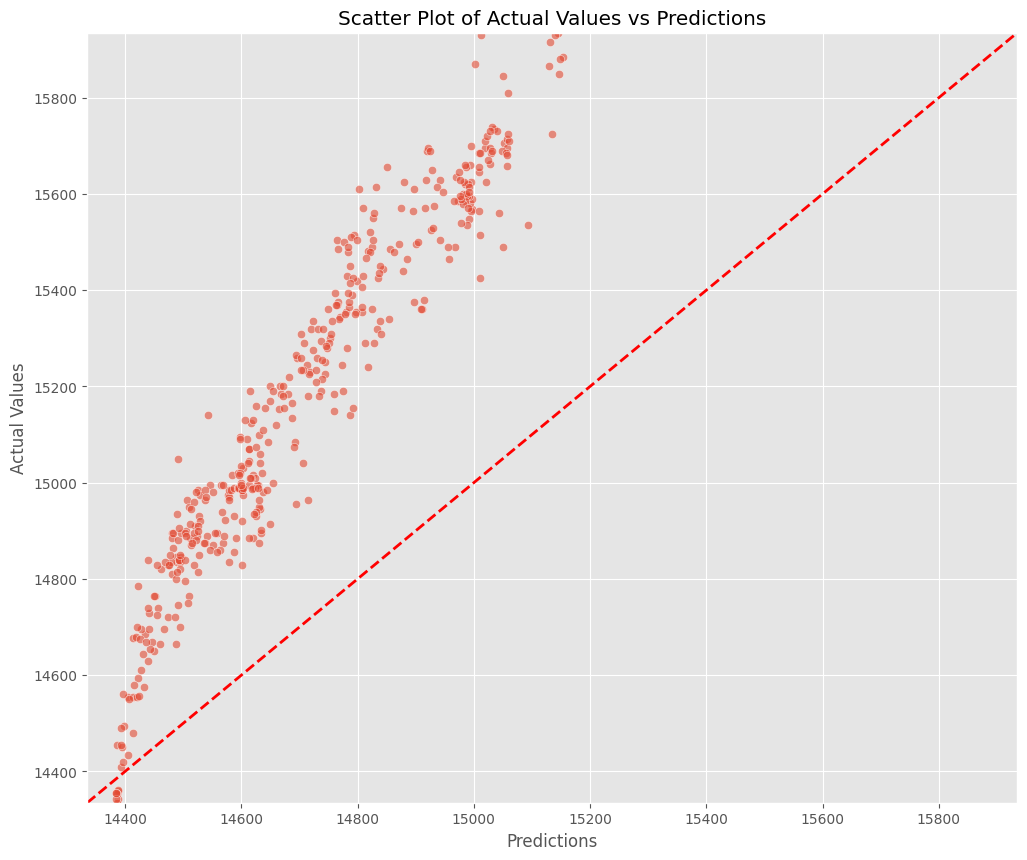

In [54]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.scatterplot(x=np.ravel(pred), y=actual, alpha=0.6)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
plt.title("Scatter Plot of Actual Values vs Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.xlim([actual.min(), actual.max()])
plt.ylim([actual.min(), actual.max()])
plt.grid(True)
plt.show()